In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [13]:
cars_df = pd.read_csv("cars-dataset.csv")

In [14]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [15]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [16]:
cars_df.loc[cars_df['hp'] == "?"]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [17]:

# cars_df_copy = cars_df.copy()
## cars_df_copy.loc[(cars_df_copy['car name'] == "ford pinto") & (cars_df_copy['yr'] == 71), ['hp']] = "75"
cars_df.drop(cars_df[cars_df['hp'] == "?"].index, inplace = True)
cars_df['hp'] = cars_df['hp'].astype('int')

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [19]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [20]:
from scipy.stats import zscore
numeric_df = cars_df.drop('car name', axis=1)
car_name = cars_df.pop('car name')

cars_df_z = numeric_df.apply(zscore)


In [21]:
cars_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925


In [22]:
cars_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


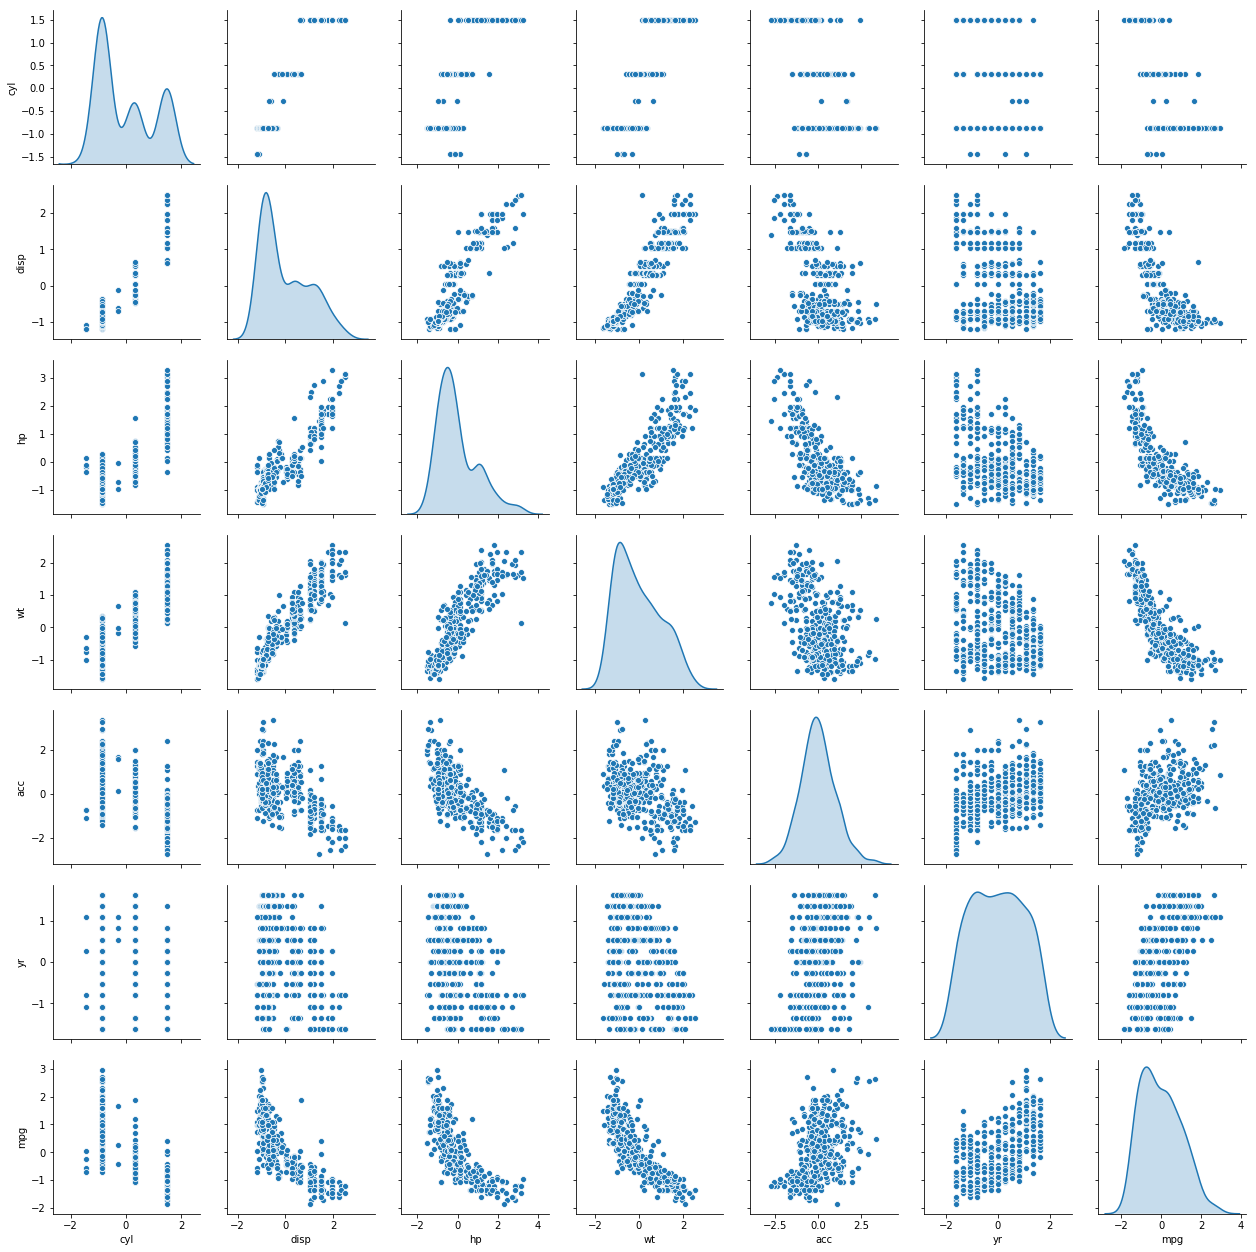

In [79]:
sns.pairplot(cars_df_z, diag_kind="kde")

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.617487
3,4,725.309400
4,5,654.621060
5,6,584.785271
6,7,537.036184
7,8,489.548471
8,9,446.542479


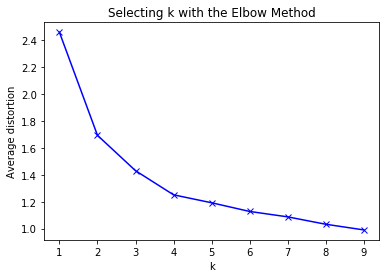

In [23]:
distortion = []
from scipy.spatial.distance import cdist
cluster_range = range(1, 10)  
cluster_errors = []
for i in cluster_range:

    clusters = KMeans( n_clusters = i)
    clusters.fit(cars_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )

    prediction=clusters.predict(cars_df_z)
#     print(prediction)
    distortion.append(sum(np.min(cdist(cars_df_z, clusters.cluster_centers_, 'euclidean'), axis=1)) / cars_df_z.shape[0])


clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.plot(cluster_range, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
clusters_df[0:15]


In [83]:
# cars_df.groupby("cyl").count()

,disp,hp,wt,acc,yr,mpg
cyl,,,,,,
3,4,4,4,4,4,4
4,199,199,199,199,199,199
5,3,3,3,3,3,3
6,83,83,83,83,83,83
8,103,103,103,103,103,103


In [84]:
# cars_df.groupby("yr").count()

,cyl,disp,hp,wt,acc,mpg
yr,,,,,,
70,29,29,29,29,29,29
71,27,27,27,27,27,27
72,28,28,28,28,28,28
73,40,40,40,40,40,40
74,26,26,26,26,26,26
75,30,30,30,30,30,30
76,34,34,34,34,34,34
77,28,28,28,28,28,28
78,36,36,36,36,36,36


In [24]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(cars_df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [25]:
prediction=cluster.predict(cars_df_z)
cars_df_z["group"] = prediction 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cdaf438>,
      dtype=object)

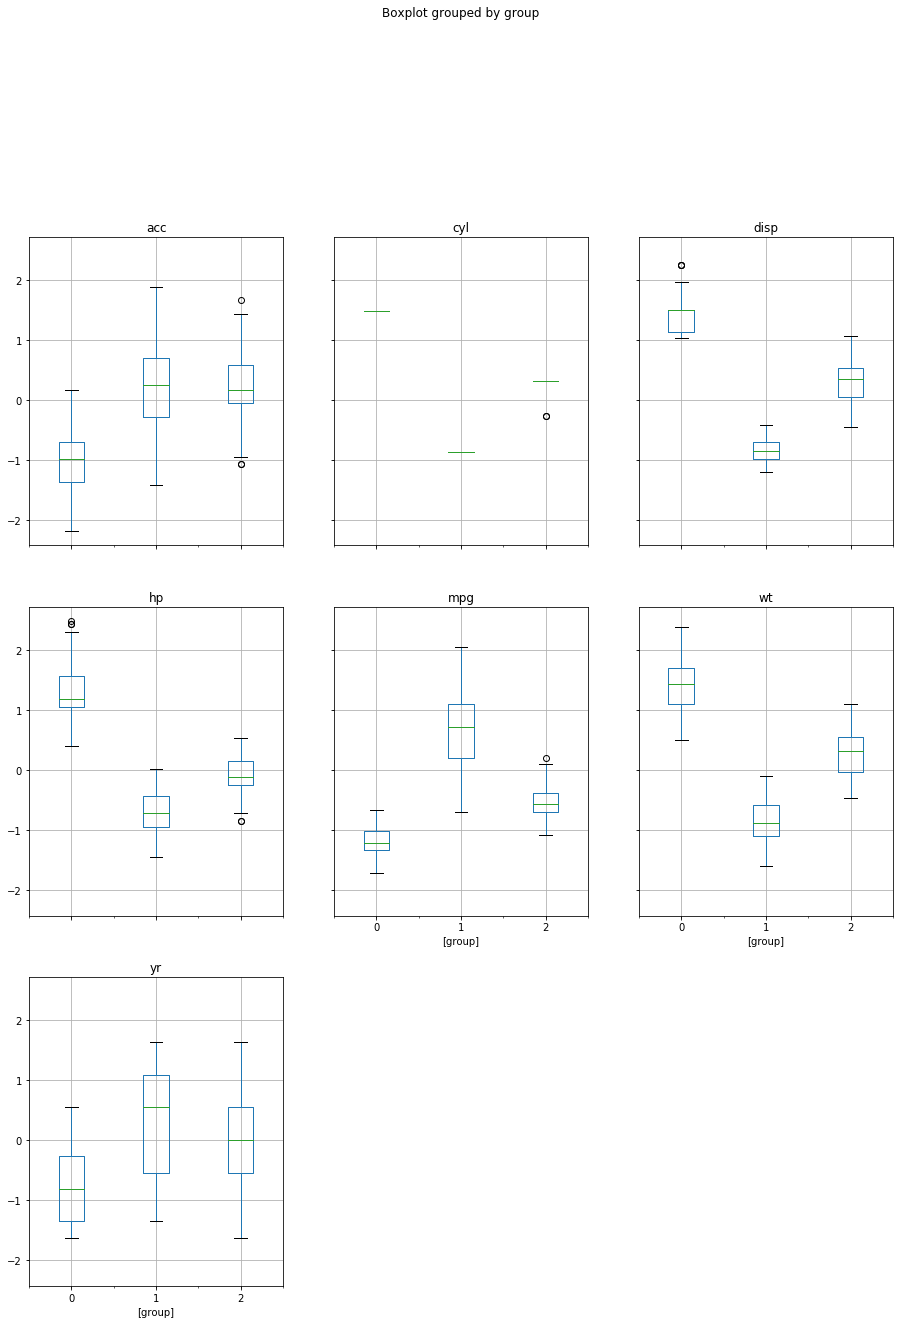

In [26]:
data = cars_df_z 
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_z['group']))

import matplotlib.pylab as plt

concat_data.boxplot(by = 'group',  layout=(6,3), figsize=(15, 40))


In [27]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.48394702,  1.48591152,  1.49929313,  1.38738246, -1.06597113,
        -0.66682598, -1.15155766],
       [-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.30830628,  0.76382895],
       [ 0.3470398 ,  0.2384915 , -0.04424757,  0.30335558,  0.29291981,
         0.01126948, -0.4725839 ]])

In [28]:
cars_df_z.groupby('group').count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,95,95,95,95,95,95,95
1,202,202,202,202,202,202,202
2,95,95,95,95,95,95,95


In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
Z = linkage(cars_df_z, 'ward')
c, coph_dists = cophenet(Z , pdist(data))

In [30]:
c

0.8199074156504789

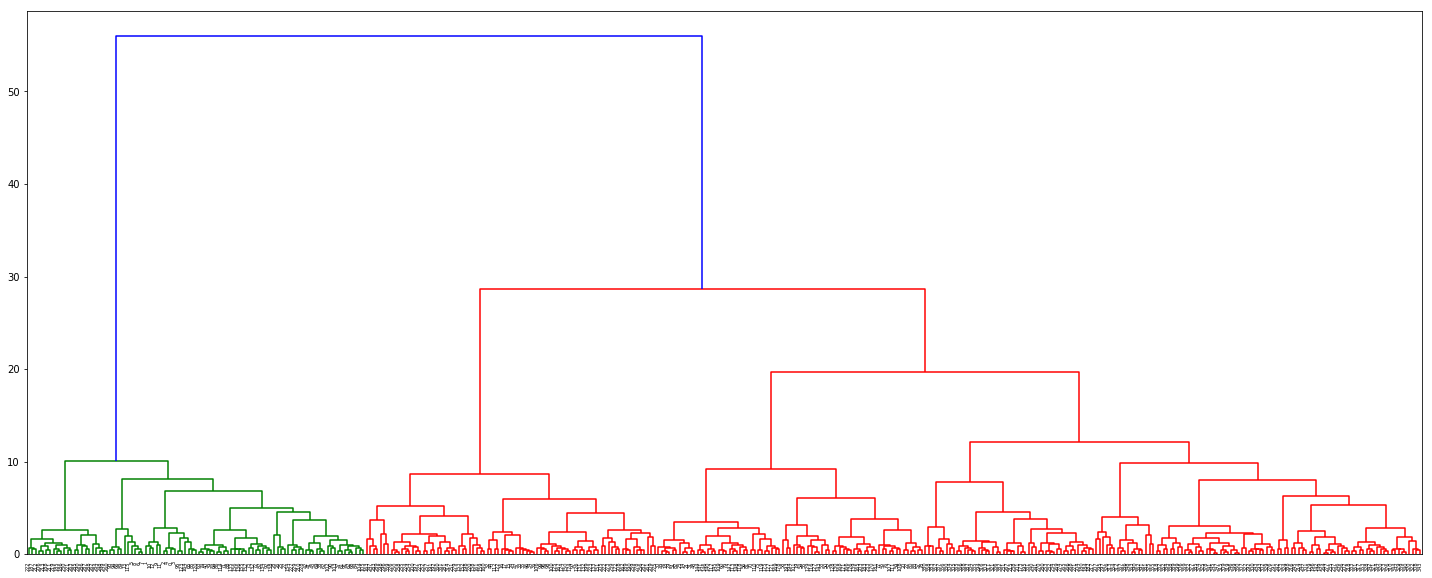

In [107]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

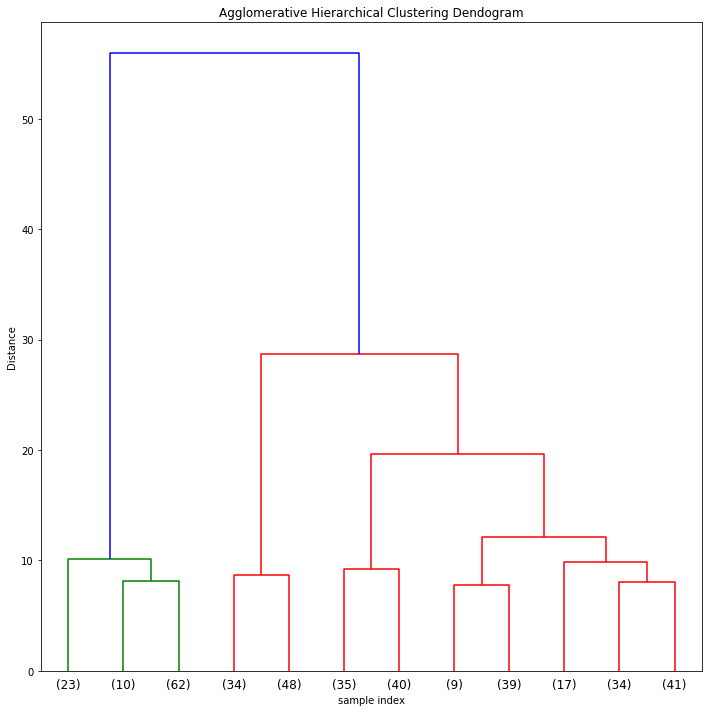

In [108]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,  p=12, truncate_mode="lastp" )
plt.tight_layout()

In [110]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [35]:
cars_df_group0 = cars_df_z.loc[cars_df_z['group'] == 0]
cars_df_group1 = cars_df_z.loc[cars_df_z['group'] == 1]
cars_df_group2 = cars_df_z.loc[cars_df_z['group'] == 2]


In [36]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [37]:
m0=smf.ols('mpg~disp+hp+yr+acc+wt+cyl',cars_df_group0).fit()

In [38]:
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     23.48
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           5.68e-15
Time:                        17:04:53   Log-Likelihood:                 27.259
No. Observations:                  95   AIC:                            -42.52
Df Residuals:                      89   BIC:                            -27.20
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2490      0.024    -10.352      0.000      -0.297      -0.201
disp          -0.0599      0.096     -0.626      0.533      -0.250       0.130
hp            -0.0938      0.048     -1.972      0.052      -0.188       0.001
yr             0.1856      0.030      6.150      0.000       0.126       0.246
acc           -0.1713      0.053     -3.259      0.002      -0.276      -0.067
wt            -0.1321      0.058     -2.267      0.026      -0.248      -0.016
cyl           -0.3695      0.036    -10.352      0.000      -0.440      -0.299
==============================================================================
Omnibus:                        7.022   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.564
Skew:                          -0.537   Prob(JB):                       0.0376
Kurtosis:                       3.710   Cond. No.                     1.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
cars_df_group0.corr()

,cyl,disp,hp,wt,acc,yr,mpg,group
cyl,1.000000e+00,-6.498823e-16,-3.875284e-16,-3.596780e-16,3.818517e-16,-9.558579e-16,-1.174724e-15,NaN
disp,-6.498823e-16,1.000000e+00,7.579715e-01,4.459401e-01,-5.799035e-01,-3.116207e-01,-3.013341e-01,NaN
hp,-3.875284e-16,7.579715e-01,1.000000e+00,3.805564e-01,-4.661624e-01,-4.712102e-01,-4.447515e-01,NaN
wt,-3.596780e-16,4.459401e-01,3.805564e-01,1.000000e+00,2.358027e-01,-1.171291e-01,-5.263231e-01,NaN
acc,3.818517e-16,-5.799035e-01,-4.661624e-01,2.358027e-01,1.000000e+00,3.684413e-01,-1.093463e-01,NaN
yr,-9.558579e-16,-3.116207e-01,-4.712102e-01,-1.171291e-01,3.684413e-01,1.000000e+00,5.259001e-01,NaN
mpg,-1.174724e-15,-3.013341e-01,-4.447515e-01,-5.263231e-01,-1.093463e-01,5.259001e-01,1.000000e+00,NaN
group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
m1=smf.ols('mpg~disp+hp+yr+acc+wt+cyl',cars_df_group1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     72.09
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           7.56e-47
Time:                        17:04:57   Log-Likelihood:                -102.68
No. Observations:                 202   AIC:                             219.4
Df Residuals:                     195   BIC:                             242.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5467      0.188      2.915      0.004       0.177       0.916
disp          -0.5461      0.231     -2.361      0.019      -1.002      -0.090
hp            -0.3154      0.154     -2.048      0.042      -0.619      -0.012
yr             0.4249      0.032     13.369      0.000       0.362       0.488
acc           -0.0039      0.049     -0.080      0.936      -0.100       0.092
wt            -0.6395      0.153     -4.178      0.000      -0.941      -0.338
cyl            1.2538      0.240      5.230      0.000       0.781       1.727
==============================================================================
Omnibus:                       18.496   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.610
Skew:                           0.645   Prob(JB):                     1.23e-05
Kurtosis:                       4.010   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
m2=smf.ols('mpg~disp+hp+yr+acc+wt+cyl',cars_df_group2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     13.11
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           1.51e-10
Time:                        17:05:00   Log-Likelihood:                -15.115
No. Observations:                  95   AIC:                             44.23
Df Residuals:                      88   BIC:                             62.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3759      0.046     -8.226      0.000      -0.467      -0.285
disp          -0.0539      0.128     -0.423      0.674      -0.307       0.200
hp            -0.0925      0.128     -0.722      0.472      -0.347       0.162
yr             0.2429      0.040      6.043      0.000       0.163       0.323
acc           -0.0832      0.071     -1.178      0.242      -0.223       0.057
wt            -0.3928      0.134     -2.932      0.004      -0.659      -0.127
cyl            0.1523      0.108      1.405      0.164      -0.063       0.368
==============================================================================
Omnibus:                       22.146   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.241
Skew:                           0.980   Prob(JB):                     1.35e-08
Kurtosis:                       5.305   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X2=cars_df_group2.drop(['mpg','disp','hp','acc', 'cyl', 'yr', 'group'],axis=1)
Y=cars_df_group2['mpg']

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


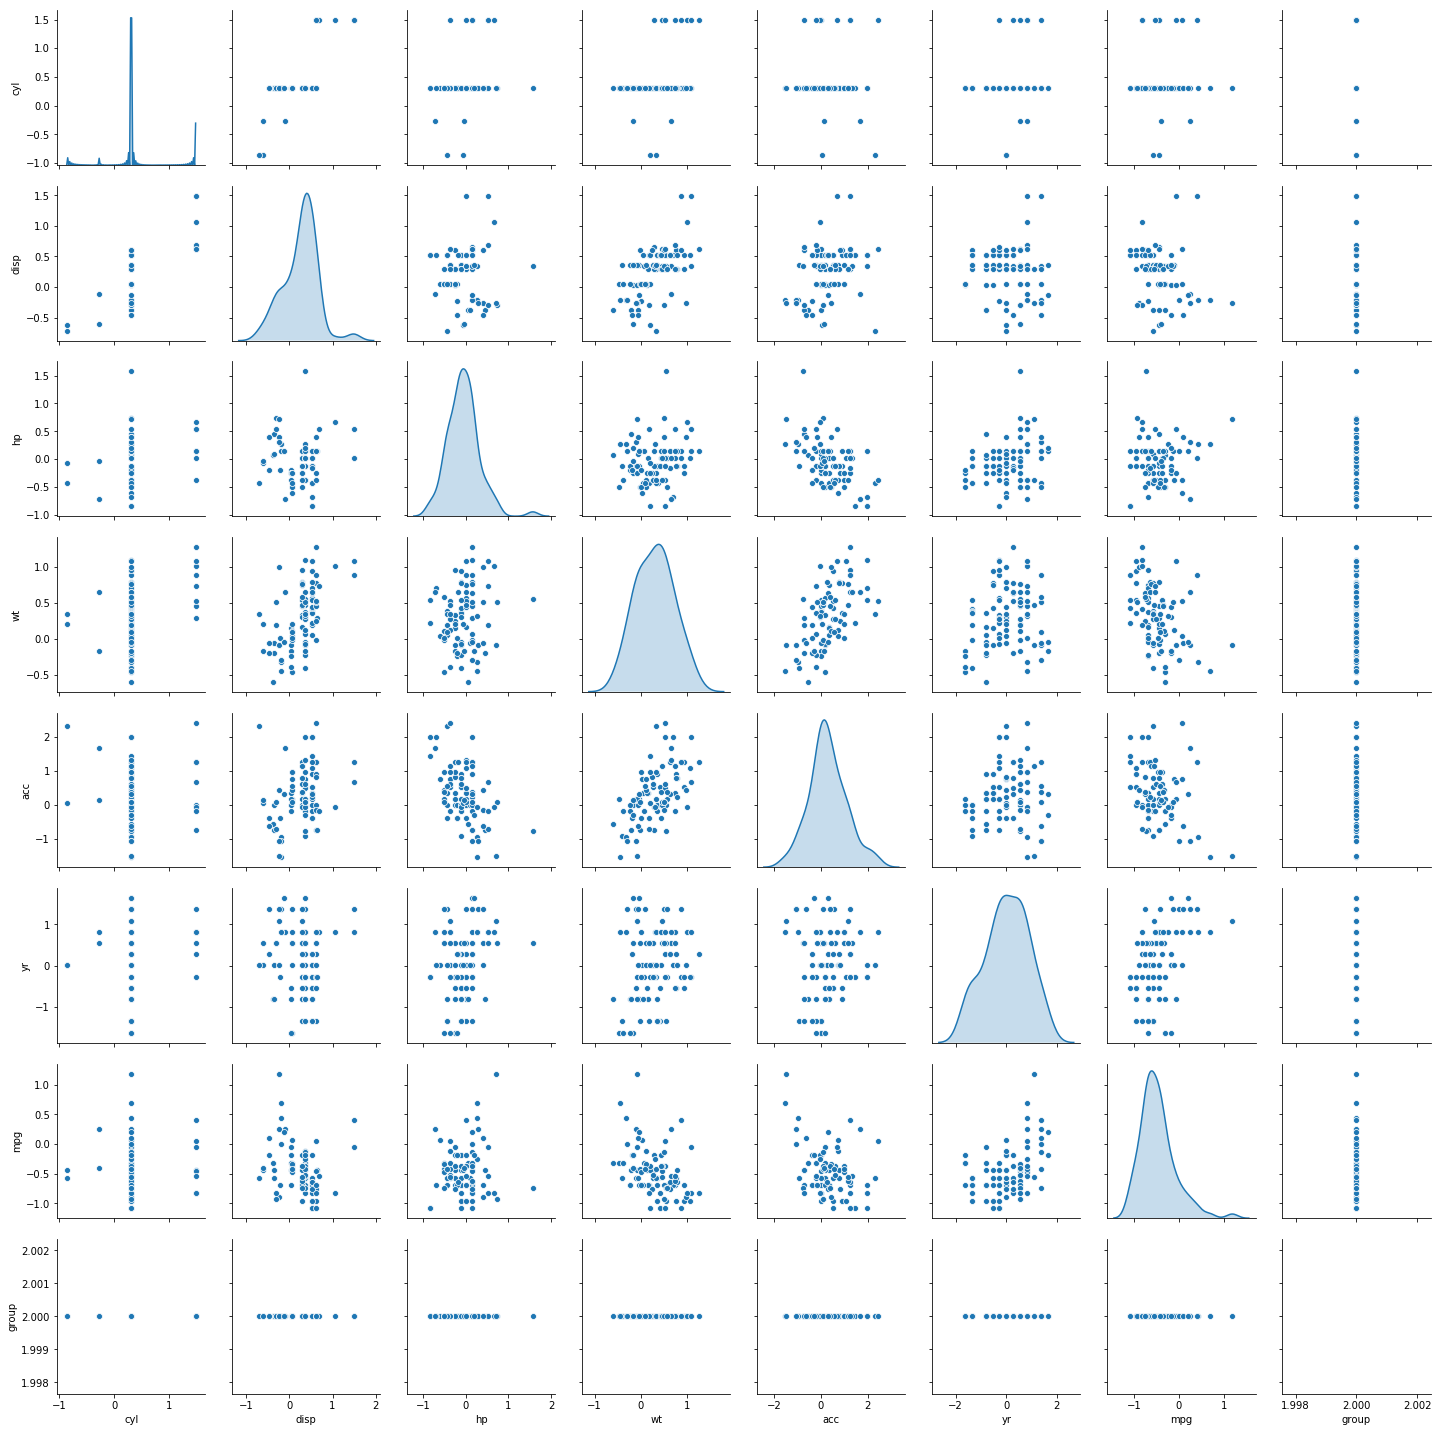

In [149]:
sns.pairplot(cars_df_group2, diag_kind="kde")

In [ ]:
# 0.3203508543329547  wt is -0.4336225407308222

In [ ]:
# 0.3243207379307521 with all parameters

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
X2train,X2test,ytrain,ytest=train_test_split(X2,Y,test_size=0.3,random_state=1)

In [57]:
model2=LinearRegression()
model2.fit(X2train,ytrain)
ypred=model2.predict(X2test)
rmse=np.sqrt(np.mean((ytest-ypred)**2))
rmse

0.3203508543329547

In [58]:
for idx, col_name in enumerate(X2train.columns):
    print("The coefficient for {} is {}".format(col_name, model2.coef_[idx]))

The coefficient for wt is -0.4336225407308222


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


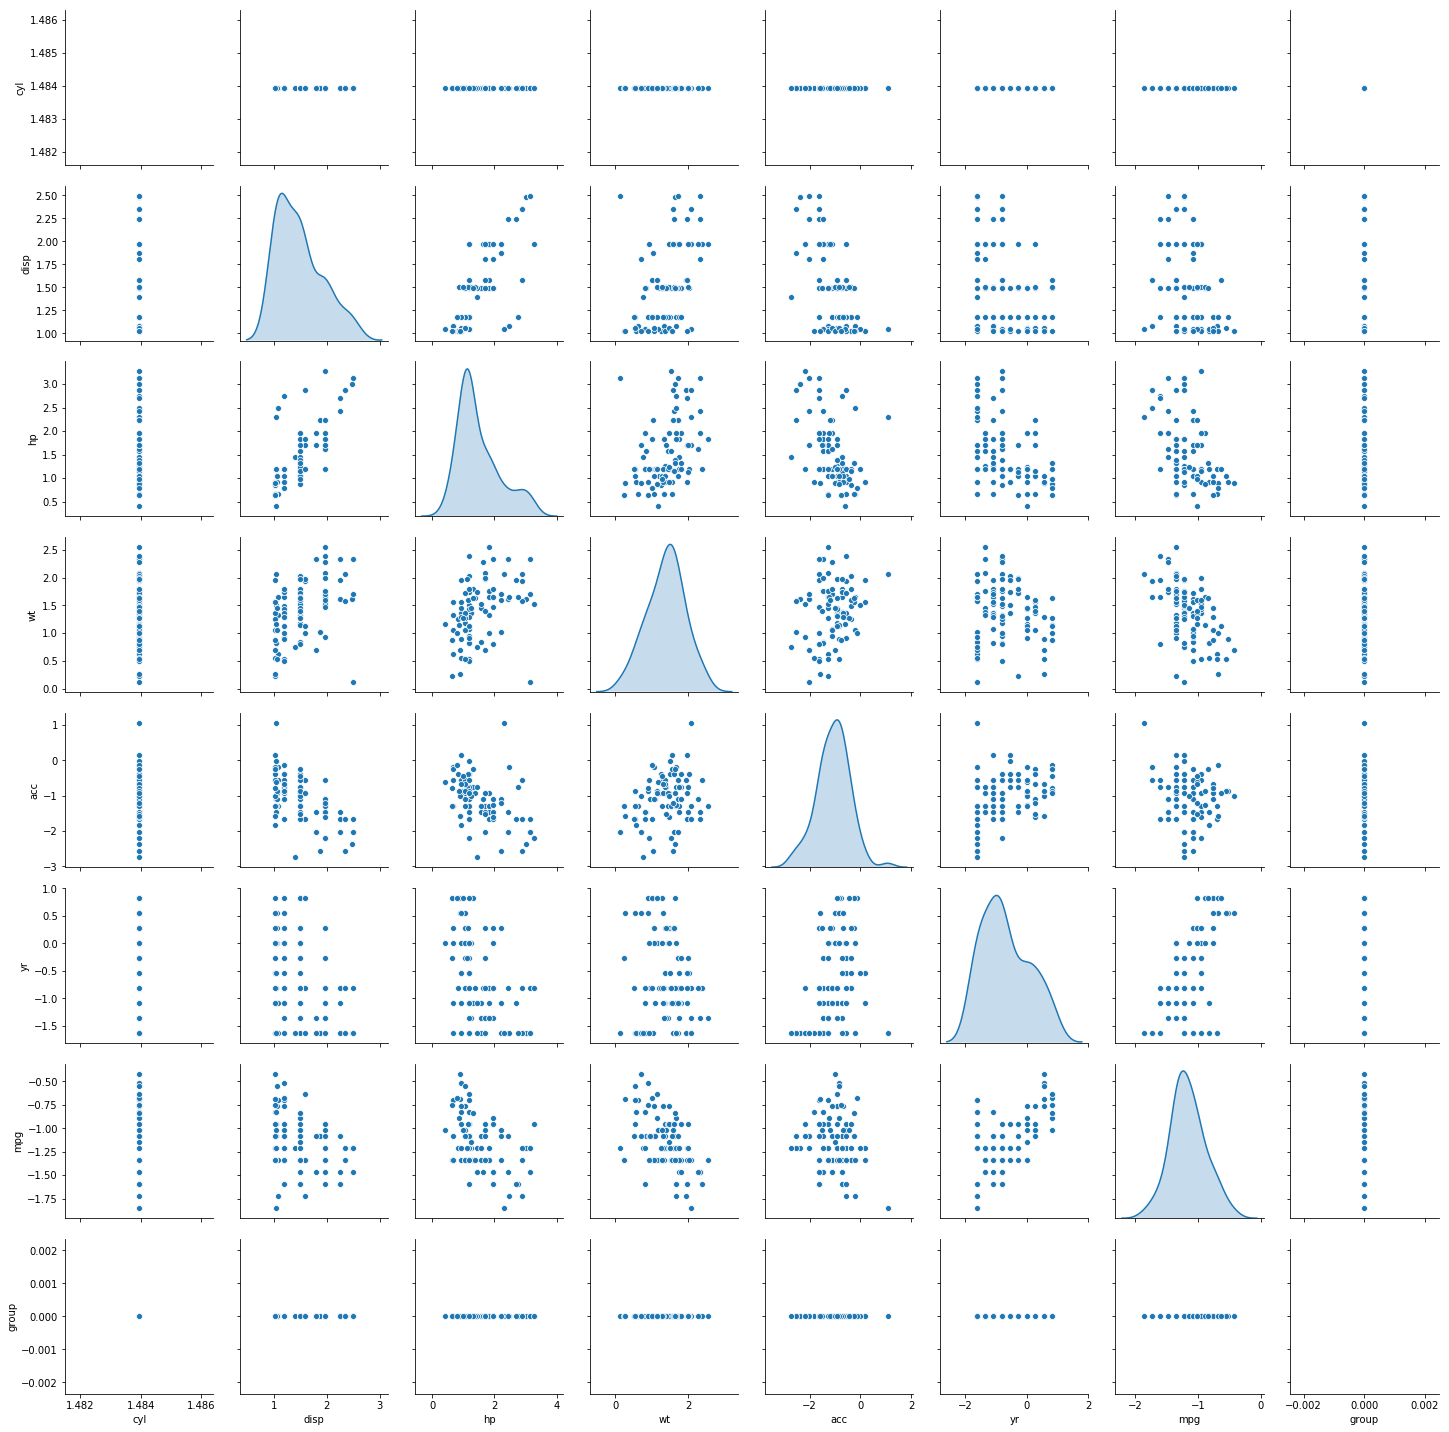

In [155]:
sns.pairplot(cars_df_group0, diag_kind = "kde")

In [59]:
X0=cars_df_group0[['wt', 'acc']]
Y0=cars_df_group0['mpg']

In [60]:
X0train,X0test,y0train,y0test=train_test_split(X0,Y0,test_size=0.3,random_state=1)

In [61]:
model0=LinearRegression()
model0.fit(X0train,y0train)
y0pred=model0.predict(X0test)
rmse=np.sqrt(np.mean((y0test-y0pred)**2))
rmse

0.24921804139224013

In [62]:
for idx, col_name in enumerate(X0train.columns):
    print("The coefficient for {} is {}".format(col_name, model0.coef_[idx]))

The coefficient for wt is -0.271778581397495
The coefficient for acc is -0.004683584381952067


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


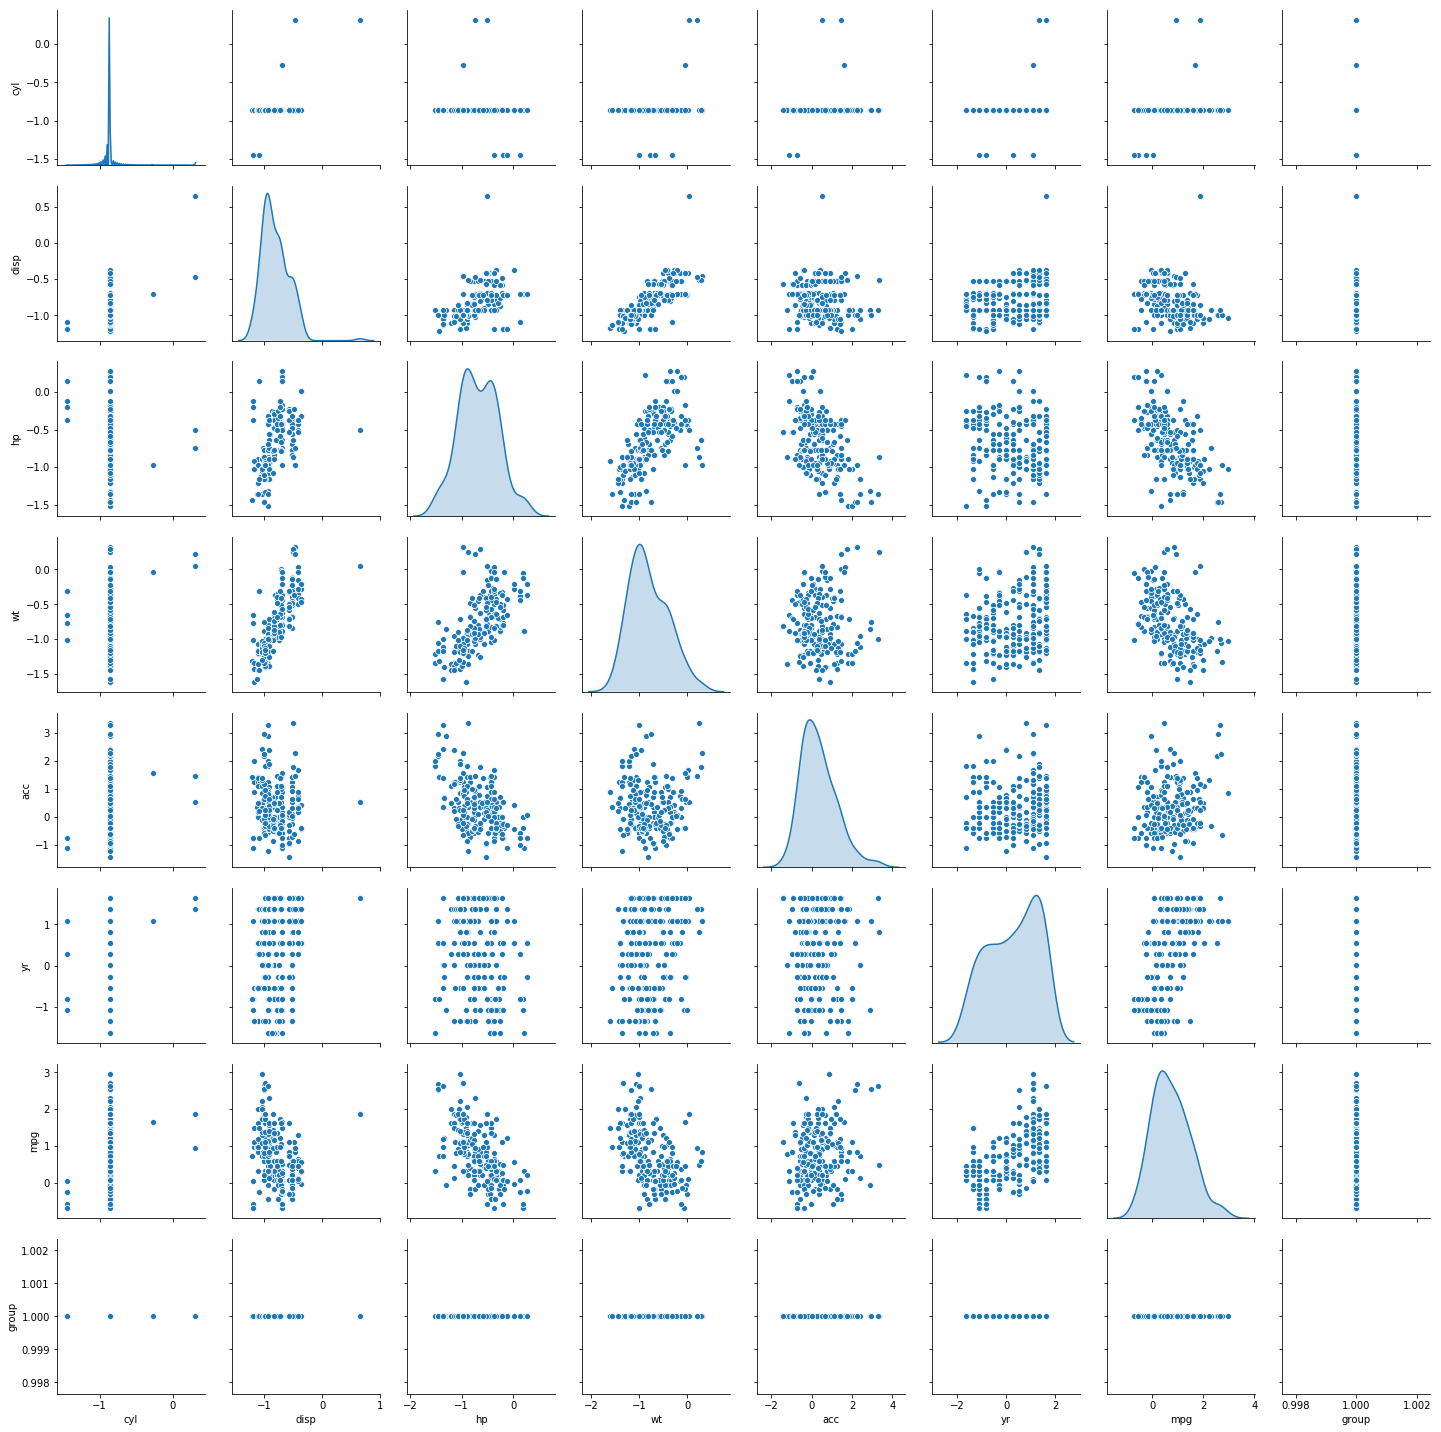

In [162]:
sns.pairplot(cars_df_group1, diag_kind = "kde")

In [63]:
X1=cars_df_group1[['wt', 'disp', 'hp']]
Y1=cars_df_group1['mpg']
X1train,X1test,y1train,y1test=train_test_split(X1,Y1,test_size=0.3,random_state=1)
model1=LinearRegression()
model1.fit(X1train,y1train)
y1pred=model1.predict(X1test)
rmse=np.sqrt(np.mean((y1test-y1pred)**2))
rmse

0.582375296133454

In [64]:
for idx, col_name in enumerate(X1train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[idx]))

The coefficient for wt is -0.44401795328837856
The coefficient for disp is 0.4790812693306245
The coefficient for hp is -1.0942561441312202
